# WEATHER PREDICTION
## Predicting it will Rain or not using some Weather Conditons.

About Dataset
Using the Columns :
* precipitation
* temp_max
* temp_min
* wind

We are going to predict the weather condition :
* drizzle
* rain
* sun
* snow 
* fog

### Link: https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Data reading and overview
data = pd.read_csv('seattle-weather.csv', parse_dates=['date'])
df = data.copy()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [4]:
# Rows number
df.shape[0]

1461

In [5]:
# Missing values number
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
# Duplicated rows number
df.duplicated().sum()

0

In [7]:
# Data types
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [8]:
# Descriptive statistics
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
# Adding new date columns
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

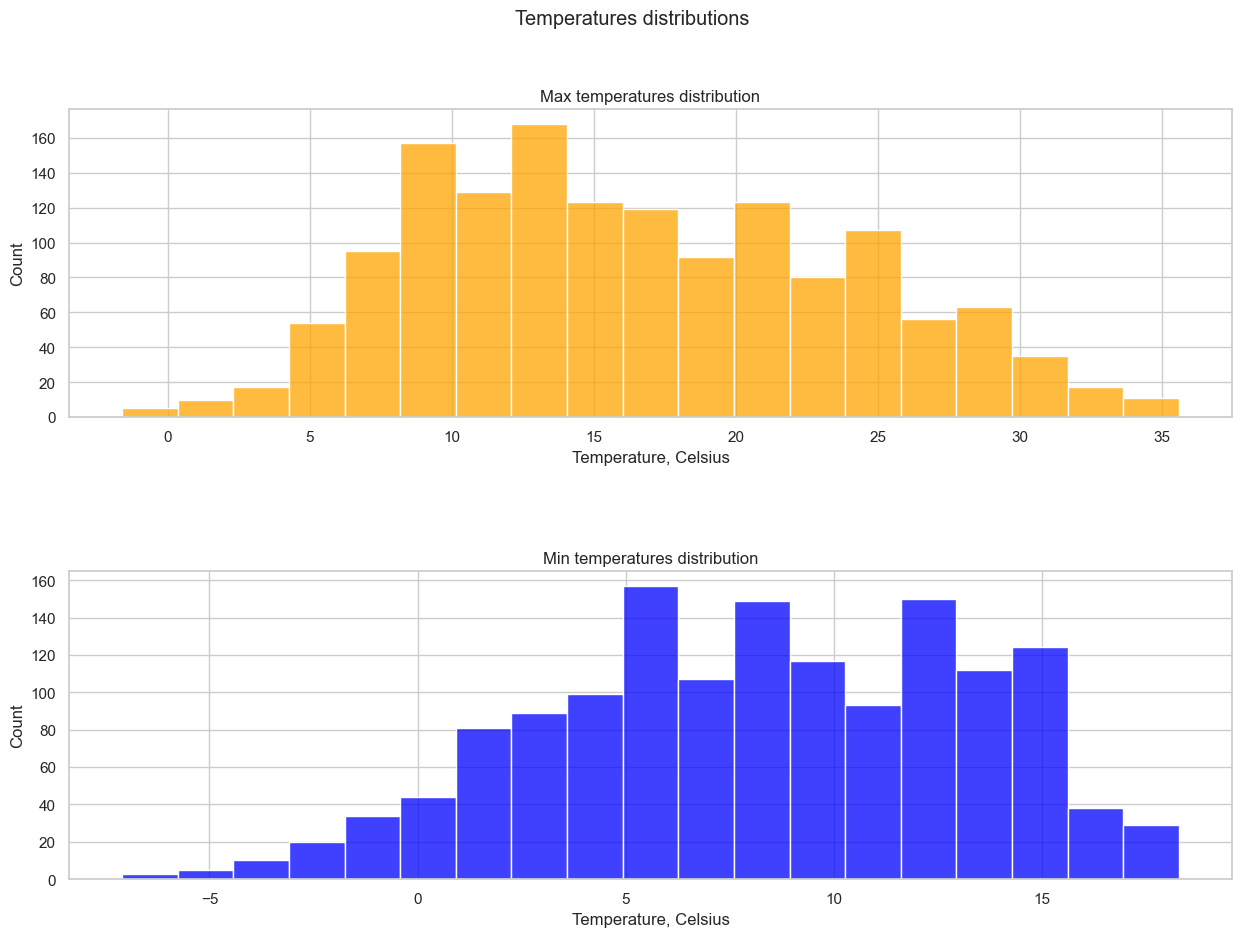

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)
sns.histplot(ax = ax1, x = df.temp_max, color='orange').set_title('Max temperatures distribution')
sns.histplot(ax = ax2, x = df.temp_min, color='blue').set_title('Min temperatures distribution')
ax1.set_xlabel('Temperature, Celsius')
ax2.set_xlabel('Temperature, Celsius')
fig.set_figwidth(15)
fig.set_figheight(10)
fig.suptitle('Temperatures distributions')
plt.show()

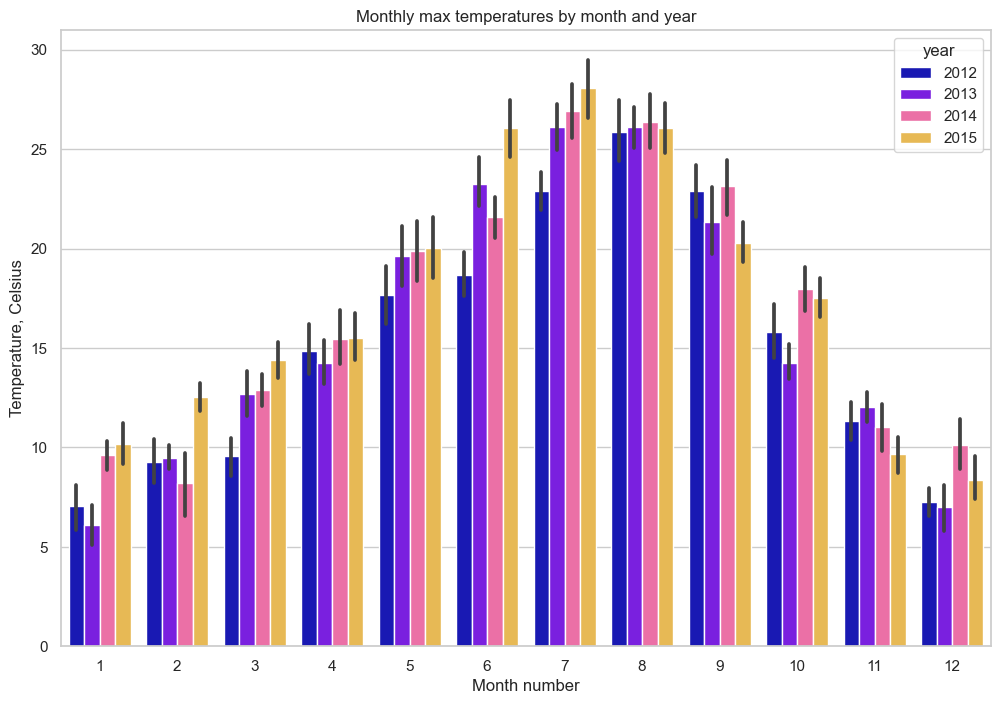

In [11]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'month', y = 'temp_max', hue = 'year', palette='gnuplot2')
plt.title('Monthly max temperatures by month and year')
plt.ylabel('Temperature, Celsius')
plt.xlabel('Month number')
plt.show()

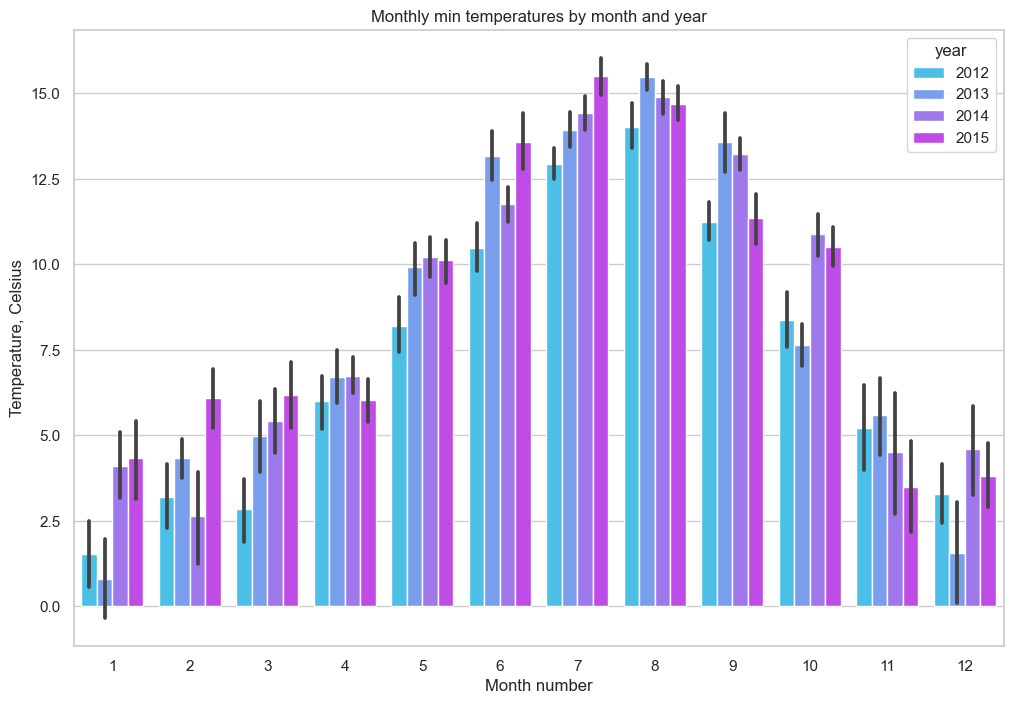

In [12]:
plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'month', y = 'temp_min', hue = 'year', palette='cool')
plt.title('Monthly min temperatures by month and year')
plt.ylabel('Temperature, Celsius')
plt.xlabel('Month number')
plt.show()

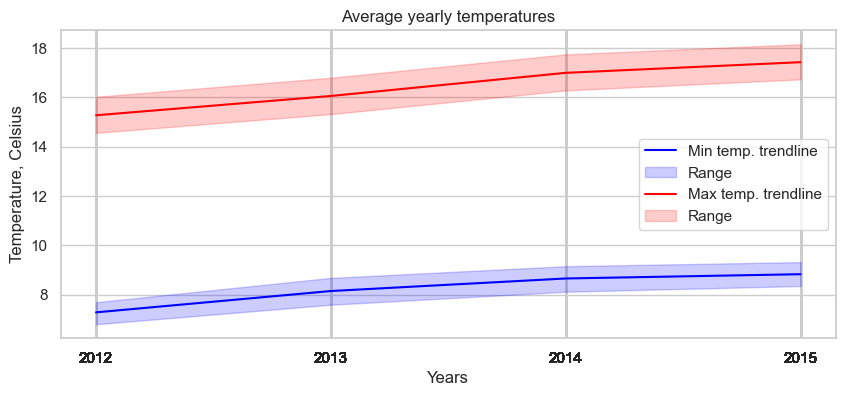

In [13]:
plt.figure(figsize = (10,4))
ax = sns.lineplot(data = df, x = 'year', y = 'temp_min', color = 'blue')
ax = sns.lineplot(data = df, x = 'year', y = 'temp_max', color = 'red')
ax.legend(['Min temp. trendline', 'Range', 'Max temp. trendline','Range'])
plt.xticks(ticks = df.year.to_list())
plt.title('Average yearly temperatures')
plt.ylabel('Temperature, Celsius')
plt.xlabel('Years')
plt.show()

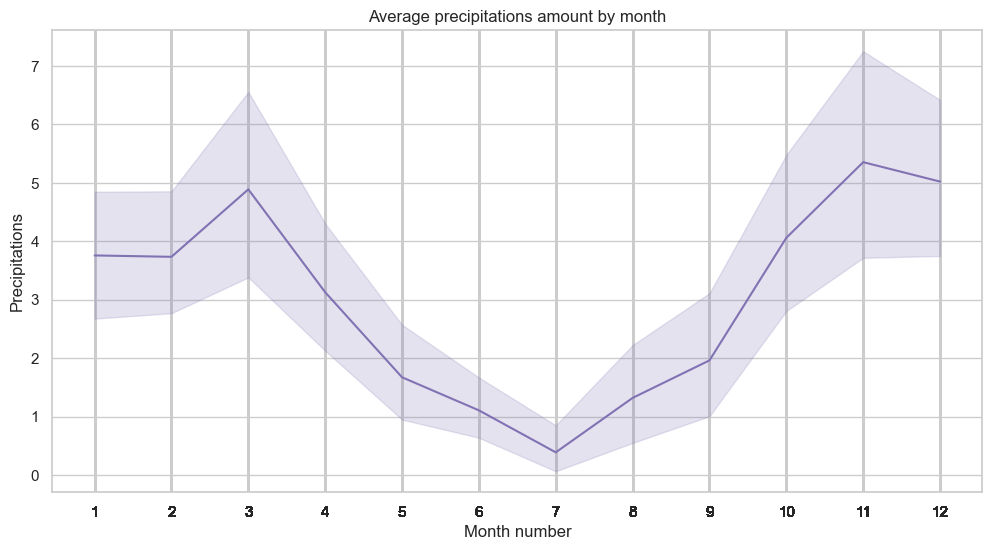

In [14]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = df, x = 'month', y = 'precipitation', color = 'm')
plt.title('Average precipitations amount by month')
plt.ylabel('Precipitations')
plt.xlabel('Month number')
plt.xticks(ticks = df.month.to_list())
plt.show()

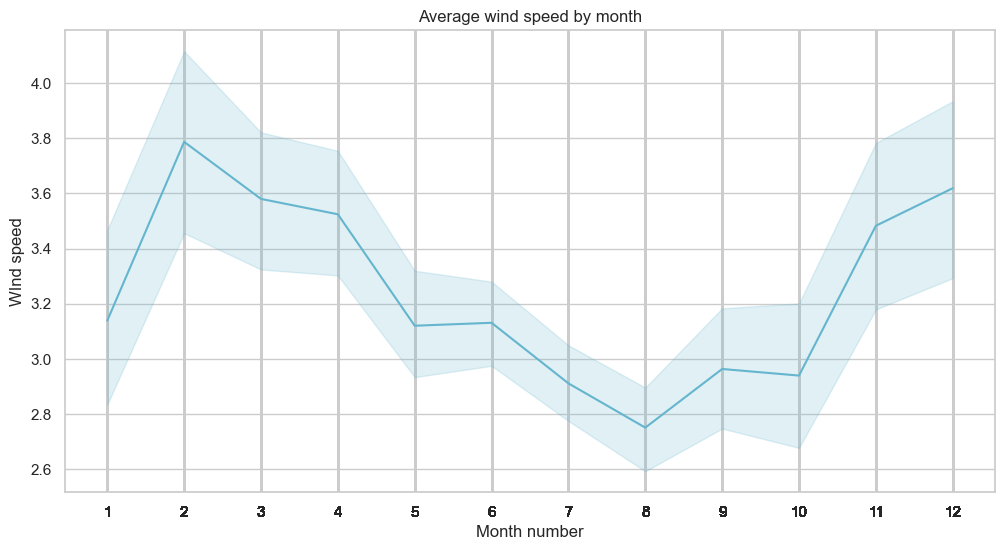

In [15]:
plt.figure(figsize = (12,6))
ax = sns.lineplot(data = df, x = 'month', y = 'wind', color = 'c')
plt.title('Average wind speed by month')
plt.ylabel('WInd speed')
plt.xlabel('Month number')
plt.xticks(ticks = df.month.to_list())
plt.show()

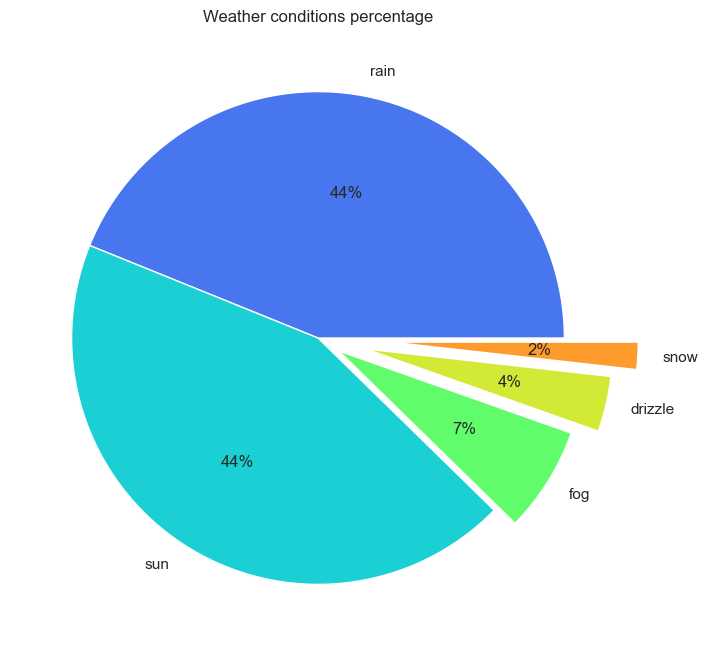

In [16]:
colors = sns.color_palette('turbo')
plt.figure(figsize = (10,8))
df.weather.value_counts().plot.pie(colors = colors, autopct='%.0f%%', explode = [0,0,0.1,0.2,0.3])
plt.ylabel('')
plt.title('Weather conditions percentage')
plt.show()

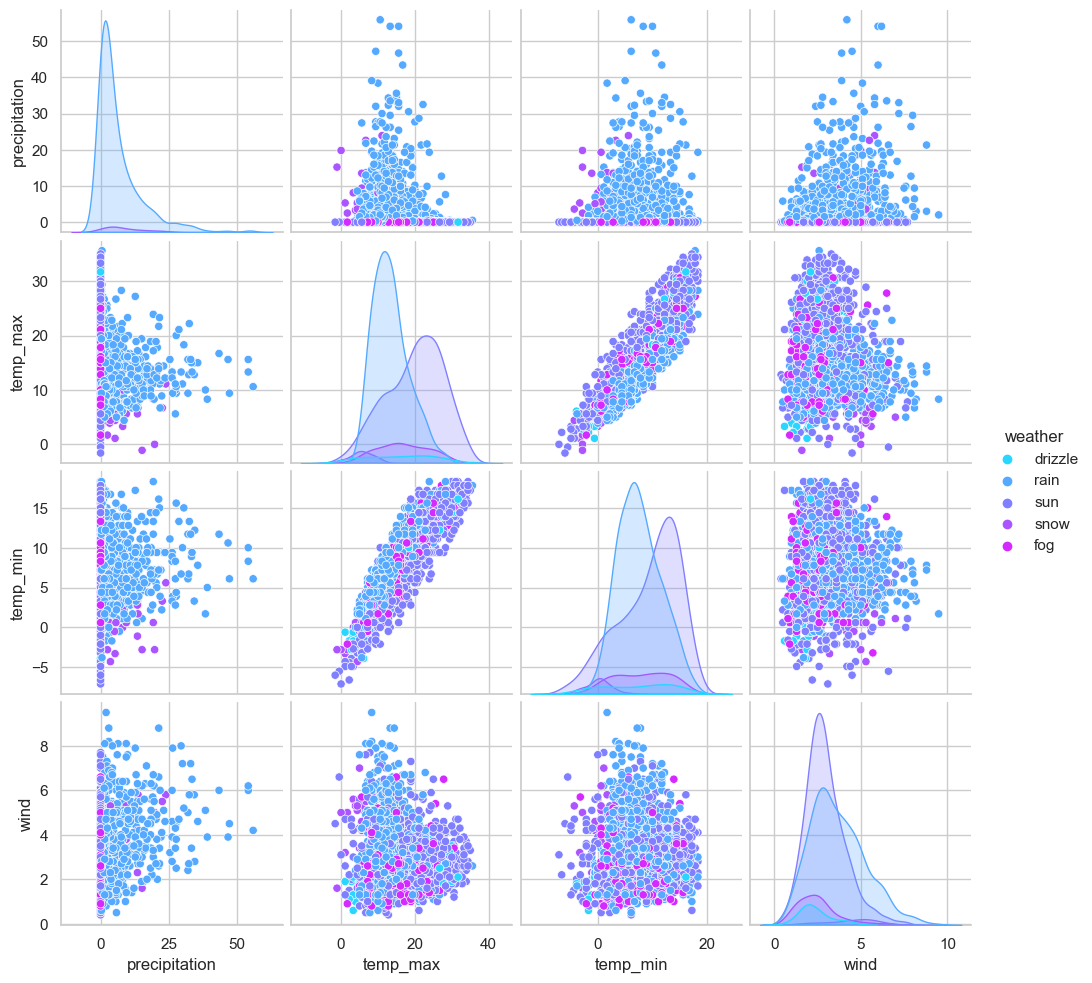

In [17]:
sns.pairplot(data=data, hue='weather', palette='cool')
plt.show()

### Analytics report:

* Precipitations mostly equal to zero.

* Most common wind speed is 2.6 meter per second.

* Rain is more frequent when max temperature is 15 degree and min temperature is 5 degree.

* Overall temperature range is between -7 and 35 degree.

* Snow is the least frequent weather condition (2%).

* Sun and rain are the most frequent weather conditions (44% each).

* July usually reaches maximum temperature.

* January usually reaches minimal temperature.

* Average yearly temperatures are growing every year.

* July has minimal average amount of precipitations.

* November has maximal average amount of precipitations.

* February is the most windy month.

* August is the least windy month.

## Rain prediction

<AxesSubplot:>

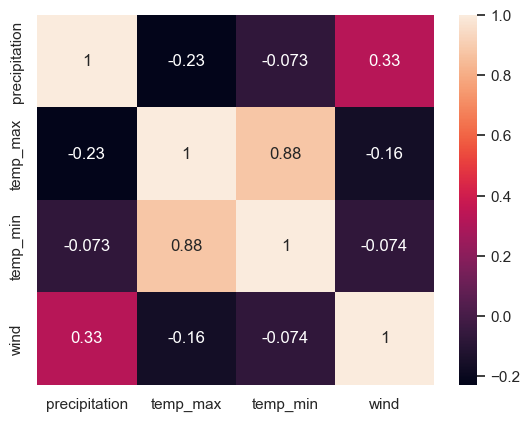

In [18]:
# Correlstions
sns.heatmap(data.corr(), annot=True)

In [19]:
# Encoding target values to numericals
encoder = LabelEncoder()
y = encoder.fit_transform(data.weather)

In [20]:
# Droppin target and date from predictors
X = data.drop(columns = ['weather', 'date'])

In [21]:
# Scaling numericals
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [22]:
# Slplitting data to train and test samples
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
# Models fitting
LR = LogisticRegression()
GB = GradientBoostingClassifier(learning_rate=0.005, max_depth=4)
DT = DecisionTreeClassifier(max_depth=3)
RF = RandomForestClassifier(max_depth=3)
models = [LR, GB, DT, RF]


for model in models:
    model.fit(x_train, y_train)

In [24]:
# Confusion matrix for each model
for model in models:
    print(str(model).split('(')[0]+':')
    print(confusion_matrix(model.predict(x_test),y_test),'\n')

LogisticRegression:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  4   7 158   8  34]
 [  0   0   0   0   0]
 [ 10  28  31   0 159]] 

GradientBoostingClassifier:
[[  2   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 176   6   0]
 [  0   0   0   1   0]
 [ 12  35  13   1 193]] 

DecisionTreeClassifier:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 176   6   0]
 [  0   0   0   2   0]
 [ 14  35  13   0 193]] 

RandomForestClassifier:
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0 176   7   0]
 [  0   0   0   1   0]
 [ 14  35  13   0 193]] 



In [25]:
# Classification models report
for model in models:
    print(str(model).split('(')[0]+':')
    print(classification_report(y_test, model.predict(x_test), zero_division = 0))
    print('-----------------------------------------------------')

LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        35
           2       0.75      0.84      0.79       189
           3       0.00      0.00      0.00         8
           4       0.70      0.82      0.76       193

    accuracy                           0.72       439
   macro avg       0.29      0.33      0.31       439
weighted avg       0.63      0.72      0.67       439

-----------------------------------------------------
GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.00      0.00      0.00        35
           2       0.97      0.93      0.95       189
           3       1.00      0.12      0.22         8
           4       0.76      1.00      0.86       193

    accuracy                           0.85       439
   macro avg       0.75      

#### Prediction accuracy results for all used models:

* LogisticRegression: 72%

* GradientBoostingClassifier: 85%

* DecisionTreeClassifier: 85%

* RandomForestClassifier: 84%